# Import packages and add function files to system path

In [21]:
%pip install -r requirements.txt

/Users/andreasink/.zshenv:2: permission denied: /Library/Java/JavaVirtualMachines/jdk1.8.0_311.jdk/Contents/Home
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import sys, os
import pandas as pd
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('classifiers'))))

# Specify constants

In [23]:
# Set file path to raw accelerometer data (.CSV file, unit=G's, headers = ['ts','x','y','z'])
raw_data_filepath = 'sample_wrist_accelerometer_data.csv'
# Specify raw data sampling rate (float)
raw_data_sampling_rate = 100.

# Load Raw Data

In [24]:
# Load raw data into Pandas DataFrame
raw_data_df = pd.read_csv(raw_data_filepath)
raw_data_df.head()

,ts,x,y,z
0,2019-03-21 14:58:00:500,0.1273,-0.6353,-0.3466
1,2019-03-21 14:58:00:510,0.2188,-0.6314,-0.2873
2,2019-03-21 14:58:00:520,0.2427,-0.6593,-0.2359
3,2019-03-21 14:58:00:530,0.2347,-0.6912,-0.2596
4,2019-03-21 14:58:00:540,0.1870,-0.7191,-0.3387


# Plot Raw Data

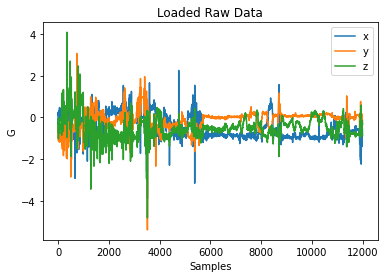

In [25]:
# Plot data
from matplotlib import pyplot as plt
raw_data_df.plot()
plt.ylabel('G')
plt.xlabel('Samples')
plt.title('Loaded Raw Data')
plt.show()

# Gait ML Model

## Extract features for gait model

In [26]:
from classifiers import gait_classifier
from classifiers import constants
# Build feature set in 3 second windows for Gait classification
gait_classifier_feature_set = gait_classifier.build_gait_classification_feature_set(raw_data_df, raw_data_sampling_rate)

# Trim calculated features to ones determined from feature selection
gait_classifier_feature_set = gait_classifier_feature_set[constants.GAIT_FEATURE_SELECTION]
gait_classifier_feature_set.head()

ModuleNotFoundError: No module named 'constants'

## Initialize gait classification model

In [ ]:
# Initialize model for training (Untrained Model)
gait_model = gait_classifier.initialize_model()
gait_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Resting Tremor ML Model

## Extract features for resting tremor model

In [ ]:
from classifiers import resting_tremor_classifier

# Build feature set in 3 second windows for resting tremor classification
tremor_classifier_feature_set = resting_tremor_classifier.build_rest_tremor_classification_feature_set(raw_data_df, raw_data_sampling_rate)
tremor_classifier_feature_set.head()

# Trim calculated features to ones determined from feature selection
tremor_classifier_feature_set = tremor_classifier_feature_set[constants.TREMOR_FEATURE_SELECTION]
tremor_classifier_feature_set.head()

,"x_bp_filt_[0.25, 3.5]_range","z_bp_filt_[3.5, 7.5]_rms","x_bp_filt_[0.25, 3.5]_rms","PC1_[3.5, 7.5]_rms","y_bp_filt_[3.5, 7.5]_spectral_flatness","y_bp_filt_[3.5, 7.5]_spectral_entropy","z_bp_filt_[3.5, 7.5]_spectral_entropy","x_bp_filt_[0.25, 3.5]_spectral_flatness","x_bp_filt_[0.25, 3.5]_spectral_entropy","y_bp_filt_[0.25, 3.5]_spectral_flatness","z_bp_filt_[0.25, 3.5]_dom_freq_value","z_bp_filt_[0.25, 3.5]_spectral_flatness","PC1_[3.5, 7.5]_spectral_entropy","PC1_[0.25, 3.5]_dom_freq_value","PC1_[0.25, 3.5]_spectral_flatness","x_bp_filt_[3.5, 7.5]_signal_entropy","y_bp_filt_[0.25, 3.5]_signal_entropy","z_bp_filt_[0.25, 3.5]_signal_entropy"
0,0.616158,0.128642,0.143968,0.125507,-6.507597,0.703712,0.740232,-12.968265,0.557542,-9.870229,0.390625,-12.818774,0.747275,0.390625,-12.441173,5.097437,4.298056,1.210843
1,1.189517,0.251191,0.312328,0.253560,-7.535671,0.739126,0.702784,-16.876019,0.434671,-10.207491,0.195312,-10.803090,0.707009,0.390625,-11.704112,3.801229,1.953074,5.049593
2,1.084730,0.097036,0.206868,0.095977,-5.404262,0.848510,0.752831,-11.344323,0.625648,-9.591438,0.390625,-15.805086,0.756254,0.585938,-15.776606,2.687391,2.758894,0.789207
3,0.799848,0.088024,0.230946,0.091409,-6.206900,0.790694,0.798732,-13.053697,0.536582,-16.799612,0.390625,-15.879248,0.789869,0.390625,-17.098345,4.868889,2.474045,0.997694
4,1.203185,0.152753,0.306229,0.152075,-7.547324,0.718677,0.737132,-13.681340,0.515729,-14.534434,1.367188,-11.503966,0.735459,0.390625,-11.779819,4.855701,2.764880,4.202279


## Initialize resting tremor classification model

In [ ]:
# Initialize model for training (Untrained Model)
resting_tremor_model = resting_tremor_classifier.initialize_model()
resting_tremor_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Get hand movement predictions from heuristic hand movement classifier

In [ ]:
from classifiers import hand_movement_classifier

# Compute hand movement predictions in 3 second windows
hand_movement_predictions = hand_movement_classifier.detect_hand_movement(raw_data_df, raw_data_sampling_rate)
hand_movement_predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1.])

# Get resting tremor amplitude predictions from heuristic rest tremor amplitude classifier

In [ ]:
from classifiers import resting_tremor_amplitude_classifier

# Compute rest tremor amplitude in 3 second windows
rest_tremor_amplitude_predictions = resting_tremor_amplitude_classifier.calculate_tremor_amplitude(raw_data_df, raw_data_sampling_rate)
rest_tremor_amplitude_predictions

[0.1764892368358236,
 0.34807775304572275,
 0.19471986611647837,
 0.14961752792401836,
 0.2416702677868822,
 0.15185669972066018,
 0.16788599199690035,
 0.15904432224905973,
 0.16121109480668125,
 0.22402226316458448,
 0.08378425577204805,
 0.2694956292065949,
 0.08128216926663187,
 0.08327487116922423,
 0.0782565553526325,
 0.07969221387570961,
 0.05793039545747214,
 0.07169238299201174,
 0.10774362536671576,
 0.06317841072899366,
 0.03830501157155898,
 0.045387343293255444,
 0.025898319832578037,
 0.044014621244228135,
 0.03218490104381895,
 0.05222547047687134,
 0.061920049033660364,
 0.051939465876540074,
 0.0620959905329505,
 0.1565395481281447,
 0.03105514569495701,
 0.02545942800928195,
 0.022811581388021095,
 0.029692308645268558,
 0.0465712417381302,
 0.02892775327626224,
 0.04703104514660536,
 0.1201705782090656,
 0.05457845947196115,
 0.20011710718923567]

# Get hand movement features predictions (hand movement amplitude & smoothness of hand movement) 

In [ ]:
from classifiers import hand_movement_features

# Calculate features of hand movement in 3 second windows
hand_movement_amplitude_predictions, hand_movement_jerk_predictions = hand_movement_features.calculate_amplitude_and_smoothness_features(raw_data_df, raw_data_sampling_rate)
print 'Hand movement amplitude'
print hand_movement_amplitude_predictions
print
print 'Smoothness of hand movement'
print hand_movement_jerk_predictions

Hand movement amplitude
[0.39436916926669857, 0.5110829980924378, 0.4787371460861114, 0.6444141774089815, 0.5272077846017971, 0.5432896768207075, 0.39880898983646673, 0.2780970399170912, 0.3997259123195979, 0.47345322239097065, 0.26594856298310215, 0.45479849346215095, 0.3536690677148727, 0.2660460528586606, 0.1878522684065125, 0.19433087631791157, 0.22318291608785143, 0.17640402831414054, 0.2290826139504245, 0.16008709684224398, 0.046207997542932366, 0.06803006010240678, 0.12234204183255713, 0.12302673273891084, 0.2583485196135524, 0.18617924470743247, 0.32701081193777914, 0.2601851766140589, 0.4525275213604472, 0.34227233511505306, 0.14822425257590055, 0.16661312820959573, 0.13080463558490263, 0.08059893773478369, 0.16268239162372375, 0.16558271371114452, 0.2961025090500101, 0.5081519273585456, 0.2271806473719067, 0.2619889262335723]

Smoothness of hand movement
[0.01866023667901831, 0.03963149628781825, 0.012486522872641612, 0.008555990082041201, 0.02717963361755693, 0.0373884926539

# Organize predictions for given data file into one pandas DataFrame

In [ ]:
def generate_dummy_predictions(length):
    '''
    Generate dummy binary predictions for example purposes. 
    :param length: (int) length of predictions to generate
    :return: list of random binary predictions
    '''
    import random
    preds = [0]*(length/2) + [1]*(length/2)
    random.shuffle(preds)
    return preds

# Generate dummy predictions for gait and tremor
gait_predictions = generate_dummy_predictions(len(hand_movement_predictions))
tremor_predictions = generate_dummy_predictions(len(hand_movement_predictions))

# Organize all module predictions into 1 Pandas DataFrame
predictions_df = pd.DataFrame()
predictions_df['hand_movement'] = pd.Series(hand_movement_predictions)
predictions_df['gait'] = pd.Series(gait_predictions)
predictions_df['tremor_constancy'] = pd.Series(tremor_predictions)
predictions_df['tremor_amplitude'] = pd.Series(rest_tremor_amplitude_predictions)
predictions_df['hand_movement_amplitude'] = pd.Series(hand_movement_amplitude_predictions)
predictions_df['hand_movement_jerk'] = pd.Series(hand_movement_jerk_predictions)
predictions_df

,hand_movement,gait,tremor_constancy,tremor_amplitude,hand_movement_amplitude,hand_movement_jerk
0,1.0,0,1,0.176489,0.394369,0.018660
1,1.0,0,1,0.348078,0.511083,0.039631
2,1.0,0,0,0.194720,0.478737,0.012487
3,1.0,1,0,0.149618,0.644414,0.008556
4,1.0,1,0,0.241670,0.527208,0.027180
5,1.0,0,1,0.151857,0.543290,0.037388
6,1.0,0,0,0.167886,0.398809,0.063306
7,1.0,0,0,0.159044,0.278097,0.047811
8,1.0,0,0,0.161211,0.399726,0.008970
9,1.0,0,1,0.224022,0.473453,0.033613


# Filter predictions by hierarchical tree 

In [ ]:
from endpoints import filter_classifier_predictions

filtered_predictions_df = filter_classifier_predictions.filter_predictions_by_tree(predictions_df)
filtered_predictions_df

,tremor_classifier_predictions,tremor_amplitude_predictions,hand_movement_predictions,hand_movement_amplitude,hand_movement_jerk
0,NA,NA,1,0.394369,0.0186602
1,NA,NA,1,0.511083,0.0396315
2,NA,NA,1,0.478737,0.0124865
3,NA,NA,NA,NA,NA
4,NA,NA,NA,NA,NA
5,NA,NA,1,0.54329,0.0373885
6,NA,NA,1,0.398809,0.0633065
7,NA,NA,1,0.278097,0.0478106
8,NA,NA,1,0.399726,0.00896961
9,NA,NA,1,0.473453,0.0336129


# Compute aggregate resting tremor endpoints

In [ ]:
from endpoints import resting_tremor_endpoints

# ---------------- # 
# Tremor Constancy
# ---------------- #
tremor_classifier_predictions = filtered_predictions_df.tremor_classifier_predictions.tolist()

# Compute tremor constancy for given data 
predicted_tremor_constancy = resting_tremor_endpoints.compute_tremor_constancy(tremor_classifier_predictions)
print 'Predicted Tremor Constancy: ', predicted_tremor_constancy, '%'

# ---------------- # 
# Tremor Amplitude
# ---------------- #
# Filter out all 'NA' from tremor amplitude predictions 
tremor_amplitude_predictions = filter(lambda x: x != 'NA', filtered_predictions_df.tremor_amplitude_predictions)

# Compute 85th percentile of tremor amplitude for given data
predicted_aggregate_tremor_amplitude = resting_tremor_endpoints.compute_aggregate_tremor_amplitude(tremor_amplitude_predictions)
print 'Predicted Aggregate Tremor Amplitude', predicted_aggregate_tremor_amplitude, 'G'

Predicted Tremor Constancy:  7.5 %
Predicted Aggregate Tremor Amplitude 0.03893785437402115 G


# Compute aggregate bradykinesia endpoints

In [ ]:
from endpoints import bradykinesia_endpoints

# ----------------------- # 
# Hand Movement Amplitude
# ----------------------- #
# Filter out all 'NA' from hand movement amplitude predictions 
hand_movement_amplitude_predictions = filter(lambda x: x != 'NA', filtered_predictions_df.hand_movement_amplitude)

# Compute aggregate hand movement amplitude for given data (Mean)
aggregate_hand_movement_amplitude = bradykinesia_endpoints.compute_aggregate_hand_movement_amplitude(hand_movement_amplitude_predictions)

# ----------------------- # 
# Hand Movement Smoothness
# ----------------------- #
# Filter out all 'NA' from hand movement smoothness predictions
hand_movement_smoothness_predictions = filter(lambda x: x != 'NA', filtered_predictions_df.hand_movement_jerk)

# Compute aggregate hand movement smoothness for given data (95th percentile)
aggregate_hand_movement_smoothness = bradykinesia_endpoints.compute_aggregate_smoothness_of_hand_movement(hand_movement_smoothness_predictions)

# --------------------------- # 
# Percentage No Hand Movement
# --------------------------- #
hand_movement_predictions = filtered_predictions_df.hand_movement_predictions.tolist()

# Compute percentage of no hand movement 
perc_no_hand_movement = bradykinesia_endpoints.compute_aggregate_percentage_of_no_hand_movement(hand_movement_predictions)

# --------------------------- # 
# Length No Hand Movement Bouts
# --------------------------- #
# Compute aggregate no hand movement bout length (mean)
aggregate_no_hm_bout_length = bradykinesia_endpoints.compute_aggregate_length_of_no_hand_movement_bouts(hand_movement_predictions)

# Print Results
print 'Mean hand amplitude:', aggregate_hand_movement_amplitude, 'G'
print '95th percentile hand movement smoothness:', aggregate_hand_movement_smoothness
print 'Percentage no hand movement:', perc_no_hand_movement, '%'
print 'Mean no hand movement bout length:', aggregate_no_hm_bout_length, 'sec'

Mean hand amplitude: 0.31623781539319373 G
95th percentile hand movement smoothness: 0.06567446159448855
Percentage no hand movement: 10.0 %
Mean no hand movement bout length: 2.0 sec
